In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from copy import deepcopy
from sklearn.model_selection import train_test_split

font = {'size'   : 20}
plt.matplotlib.rc('font', **font)

# Линейная регрессия

In [2]:
k_init = 5
b_init = 10

X = np.arange(0, 100)
y_real = k_init * X + b_init
noise = np.random.uniform(-3, 3, size=X.shape)
y_sampled = (noise + k_init) * X + b_init + nois
X_train, X_test, y_train, y_test = train_test_split(X, y_sampled, test_size=0.2)

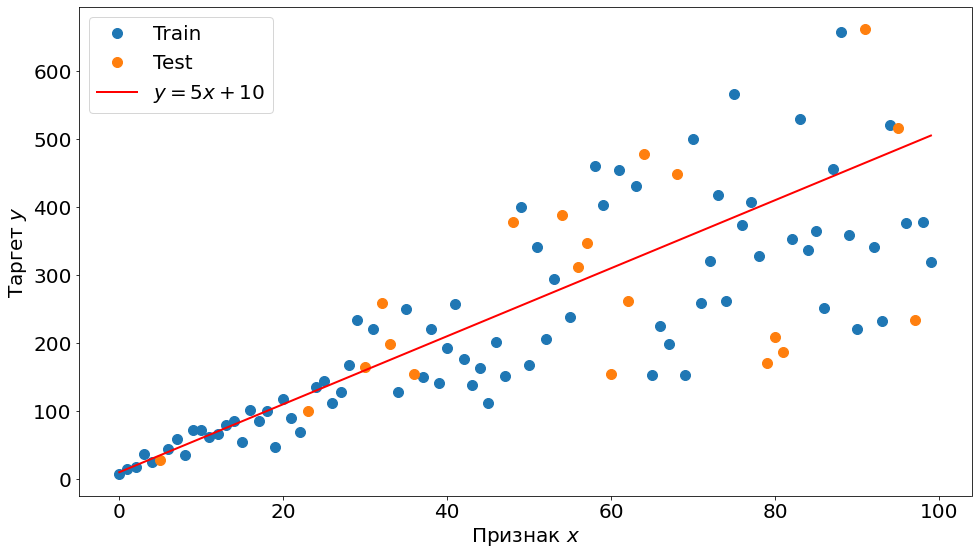

In [3]:
plt.figure(figsize=(16, 9))
plt.plot(X_train, y_train, 'o', label='Train', markersize=10)
plt.plot(X_test, y_test, 'o', label='Test', markersize=10)
plt.plot(X, y_real, 'r-', label=r'$y = 5 x + 10$', linewidth=2)
plt.xlabel('Признак $x$')
plt.ylabel('Таргет $y$')
plt.legend()
plt.show()

In [4]:
def get_coef(X, y):
    ones = np.ones(X.shape[0])
    X_new = np.concatenate((X[np.newaxis], ones[np.newaxis]), axis=0).T
    return np.linalg.inv(X_new.T.dot(X_new)).dot(X_new.T).dot(y)

def get_coef_ridge(X, y, lambda_):
    ones = np.ones(X.shape[0])
    X_new = np.concatenate((X[np.newaxis], ones[np.newaxis]), axis=0).T
    return np.linalg.inv(X_new.T.dot(X_new) + lambda_ * np.eye(X_new.shape[1])).dot(X_new.T).dot(y)

def mse(y, y_pred):
    return np.mean(np.square(y - y_pred))

Linear:
k = 4.17497483971948, b = 26.95452626230002
Train MSE: 7560.8
Test MSE: 16687.7
Ridge:
k = 4.5077063786262865, b = 4.95730547042801
Train MSE: 7695.3
Test MSE: 17134.8


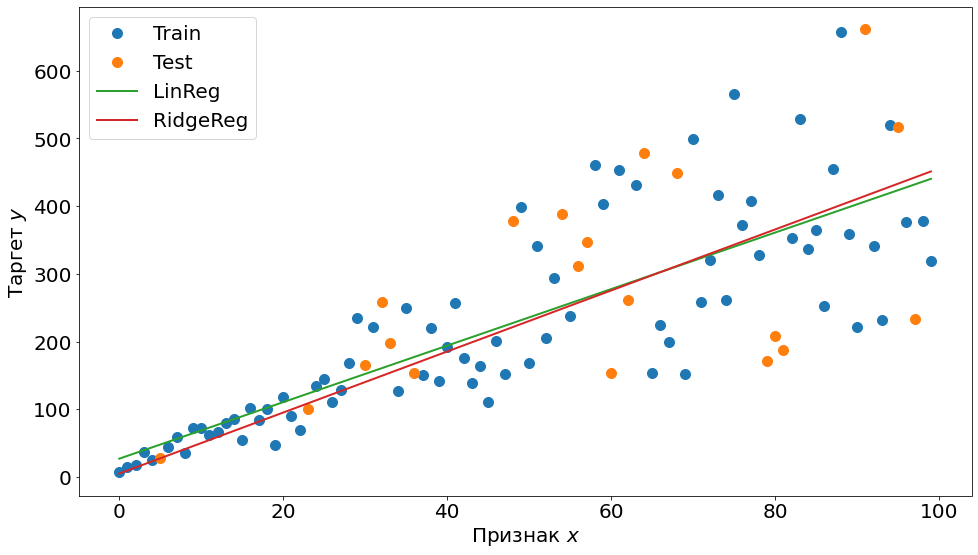

In [5]:
plt.figure(figsize=(16, 9))
plt.plot(X_train, y_train, 'o', label='Train', markersize=10)
plt.plot(X_test, y_test, 'o', label='Test', markersize=10)

k, b = get_coef(X_train, y_train)
y_pred_train = k * X_train + b
y_pred_test = k * X_test + b

print('Linear:')
print(f'k = {k}, b = {b}')
print(f'Train MSE: {np.round(mse(y_train, y_pred_train), 1)}')
print(f'Test MSE: {np.round(mse(y_test, y_pred_test), 1)}')
plt.plot(X, k * X + b, '-', label='LinReg', linewidth=2)

k, b = get_coef_ridge(X_train, y_train, lambda_=100)
y_pred_train = k * X_train + b
y_pred_test = k * X_test + b

print('Ridge:')
print(f'k = {k}, b = {b}')
print(f'Train MSE: {np.round(mse(y_train, y_pred_train), 1)}')
print(f'Test MSE: {np.round(mse(y_test, y_pred_test), 1)}')
plt.plot(X, k * X + b, '-', label='RidgeReg', linewidth=2)

plt.xlabel('Признак $x$')
plt.ylabel('Таргет $y$')
plt.legend()
# plt.savefig('init.png', dpi=300)
plt.show()

# Ядерная регрессия

In [6]:
X = np.linspace(-10, 10, 100)
y_real = 100*np.sin(np.square(X)/10)
noise = np.random.uniform(-50, 50, size=X.shape)
y_sampled = 100*np.sin(np.square(X)/10) + noise

X_train, X_test, y_train, y_test = train_test_split(X, y_sampled, test_size=0.2)

Linear:
k = -0.9409429710780808, b = 31.35965474293897
Train MSE: 4442.7
Test MSE: 4333.9


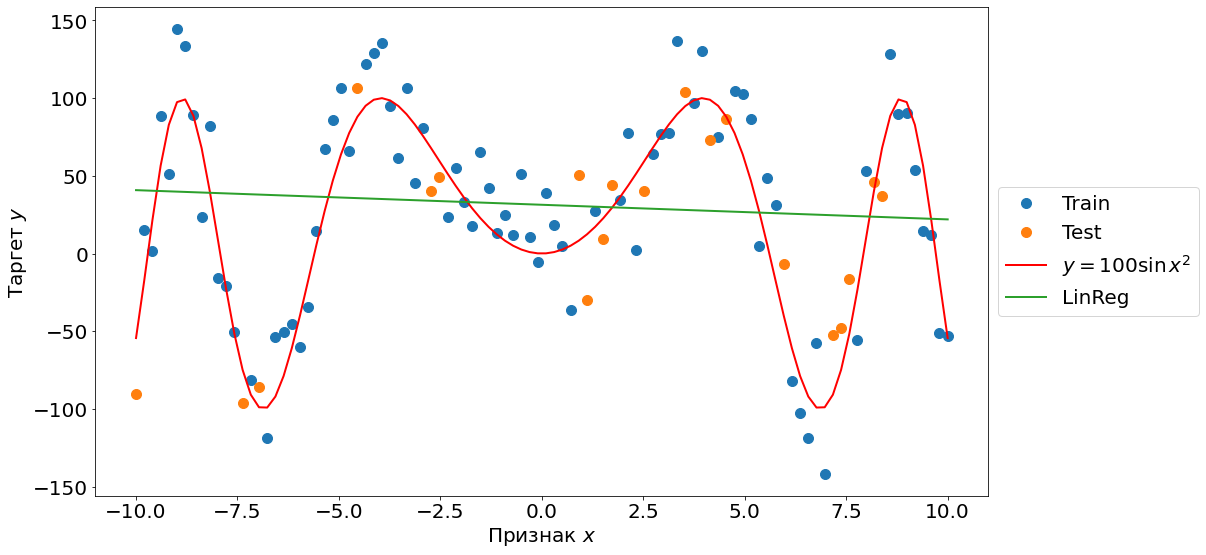

In [7]:
plt.figure(figsize=(16, 9))
plt.plot(X_train, y_train, 'o', label='Train', markersize=10)
plt.plot(X_test, y_test, 'o', label='Test', markersize=10)
plt.plot(X, y_real, 'r-', label=r'$y = 100\sin x^2$', linewidth=2)
k, b = get_coef(X_train, y_train)
y_pred_train = k * X_train + b
y_pred_test = k * X_test + b

print('Linear:')
print(f'k = {k}, b = {b}')
print(f'Train MSE: {np.round(mse(y_train, y_pred_train), 1)}')
print(f'Test MSE: {np.round(mse(y_test, y_pred_test), 1)}')
plt.plot(X, k * X + b, '-', label='LinReg', linewidth=2)
plt.xlabel('Признак $x$')
plt.ylabel('Таргет $y$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [8]:
def log_rbf_kernel(X, sigma=1):
    M = np.zeros((X.shape[0], X.shape[0]))
    for i in range(X.shape[0]):
        for j in range(X.shape[0]):
            M[i][j] = np.linalg.norm(X[i]-X[j]) ** 2
    return M

def kernel_ridge_solution(X, lambda_=1, sigma=1):
    ones = np.ones(X.shape[0])
    X_new = np.concatenate((X[np.newaxis], ones[np.newaxis]), axis=0).T
    K = np.exp(-sigma * log_rbf_kernel(X_new, sigma=sigma))
    W = np.dot(K, np.linalg.inv(K + lambda_ * np.eye(X_new.shape[0])))
    return W, K

W, K = kernel_ridge_solution(X_train, lambda_=2, sigma=1)
y_pred_train = W.dot(y_train)

$$
K = \exp\left[-\sigma * M\right] 
$$

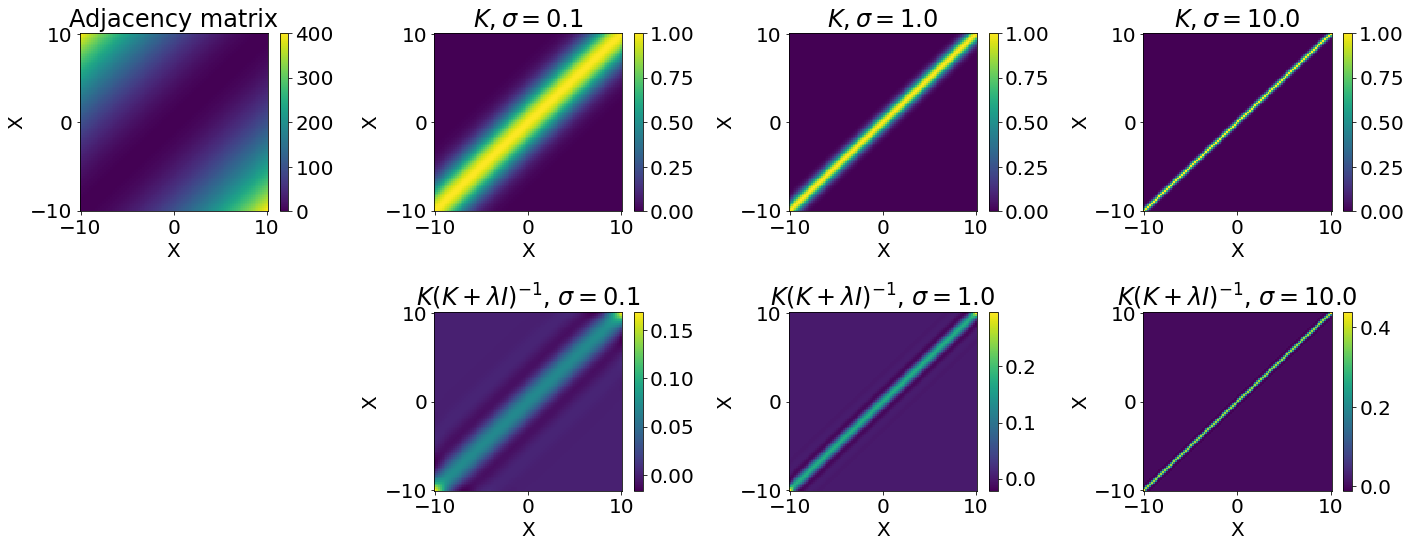

In [9]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20, 8))

ones = np.ones(X.shape[0])
X_new = np.concatenate((X[np.newaxis], ones[np.newaxis]), axis=0).T

ax1.set_title('Adjacency matrix')
sc = ax1.pcolormesh(X, X, log_rbf_kernel(X_new))
ax1.set_xlabel('X')
ax1.set_ylabel('X')
fig.colorbar(sc, ax=ax1)

ax5.axis('off')

sigma = 0.1
for ax in (ax2, ax3, ax4):
    ax.set_title('$K, \sigma = $' + str(sigma))
    K = np.exp(-sigma * log_rbf_kernel(X_new))
    sc = ax.pcolormesh(X, X, K)
    ax.set_xlabel('X')
    ax.set_ylabel('X')
    fig.colorbar(sc, ax=ax)
    sigma = sigma * 10

sigma = 0.1
lambda_ = 1
for ax in (ax6, ax7, ax8):
    ax.set_title(r'$K(K+\lambda I)^{-1}$, $\sigma = $' + str(sigma))
    K = np.exp(-sigma * log_rbf_kernel(X_new))
    W = np.dot(K, np.linalg.inv(K + lambda_ * np.eye(X_new.shape[0])))
    sc = ax.pcolormesh(X, X, W)
    ax.set_xlabel('X')
    ax.set_ylabel('X')
    fig.colorbar(sc, ax=ax)
    sigma = sigma * 10

plt.tight_layout()

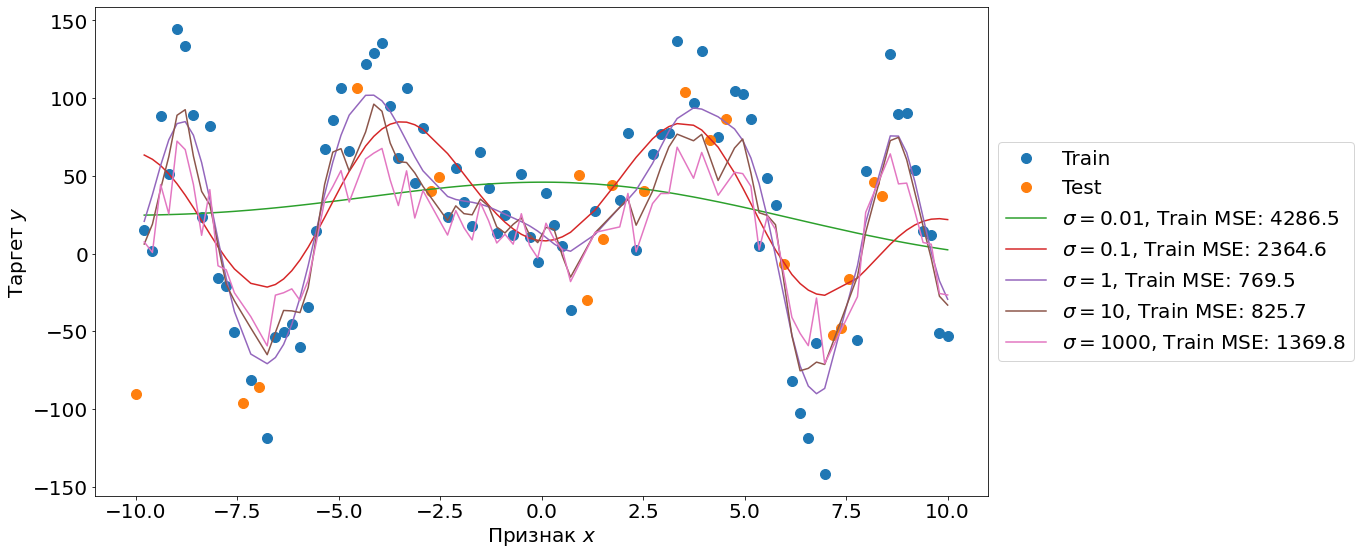

In [10]:
plt.figure(figsize=(16, 9))
plt.plot(X_train, y_train, 'o', label='Train', markersize=10)
plt.plot(X_test, y_test, 'o', label='Test', markersize=10)
for sigma in [0.01, 0.1, 1, 10, 1000]:
    W, _ = kernel_ridge_solution(X_train, lambda_=1, sigma=sigma)
    y_pred_train = W.dot(y_train)
    idx = np.argsort(X_train)
    label = r'$\sigma=$'+str(sigma) + f', Train MSE: {np.round(mse(y_train, y_pred_train), 1)}' #  + f', Test MSE: {np.round(mse(y_test, y_pred_test), 1)}'
    plt.plot(X_train[idx], y_pred_train[idx], label=label)
plt.xlabel('Признак $x$')
plt.ylabel('Таргет $y$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()